In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#global parameters

In [31]:
def initial(N):
    
    state = 2*np.random.randint(2,size=(N,N))-1
    return state

In [32]:
def mcstep(states,beta,B):
    
    for i in range(N):
        for j in range(N):
            ind1 = np.random.randint(0,N) #randomly select a state to flip it
            ind2 = np.random.randint(0,N)
            s = states[ind1,ind2]
            DS = states[(ind1+1)%N,ind2] + states[ind1,(ind2+1)%N] + states[(ind1-1)%N,ind2] + states[ind1,(ind2-1)%N]
            dE = 2*s*(DS+B)
            
            if dE<0:
                s = s*(-1)
                
            elif np.random.rand()<np.exp(-dE*beta):
                s = s*(-1)
            
            states[ind1,ind2] = s
            
    return states
            

In [33]:
def Energy(states,B):
    E = 0
    
    for i in range(len(states)):
        for j in range(len(states)):
            S = states[i,j]
            DS = states[(i+1)%N,j] + states[i,(j+1)%N] + states[(i-1)%N,j] + states[i,(j-1)%N]
            E = E + (-(DS+B)*S)
    return E/4
    

In [34]:
def Mag(states):
    m = np.sum(states)
    return m

In [35]:
## change these parameters for a smaller (faster) simulation 
nt      = 32         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [36]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initial(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcstep(config, iT,0)           # Monte Carlo moves
    
    
    for i in range(mcSteps):
        mcstep(config, iT,0) 
        Ene = Energy(config,0)     # calculate the energy
        mag = Mag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + mag
        M2 = M2 + mag*mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

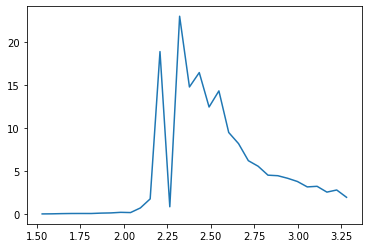

In [46]:
plt.plot(T,X)

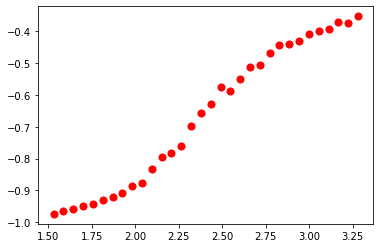

In [37]:
plt.scatter(T, E, s=50, marker='o', color='Red')

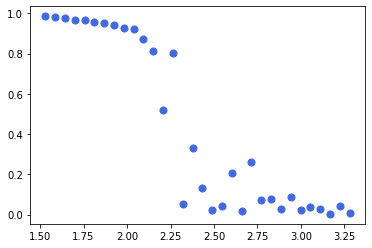

In [38]:
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')

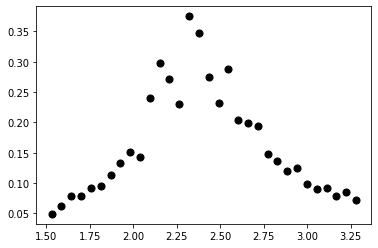

In [41]:
plt.scatter(T, C, s=50,color='Black')

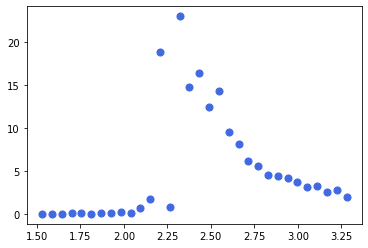

In [42]:
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')